In [43]:
import pandas as pd
import numpy as np
import glob
import sys
import os
import statsmodels.api as sm
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Math_From_Scratch import econometrics

In [27]:
datasets_path = glob.glob(r'..\data\*.csv')

csv_files = {
    path.split("\\")[-1][:-4]: path
    for path in datasets_path
} 
df_read = pd.read_csv(csv_files['dehliclimate'])
df_read['date'] = pd.to_datetime(df_read['date'])
df_read['month'] = df_read['date'].dt.month

## Classical Decomposition
Here where basically getting the value(y)-trend(t-MA) to get the seasonal component and with it we can predict by adding or multiplying 
$ Detrended = Value−Trend $</br>
$ Seasonal\ Component = Average\ of\ Detrended\ in\ the\ current\ month\ over\ year$  
</br>
$ Additive\ Decomposition :\ y_\
t = T_t + S_t + R_t $
</br>
$ Multiplicative\ Decomposition :\ y_t = T_t * S_t * R_t $

$y_t$: observed time series at time $t$

Estimate Trend-Cycle $\hat{T}_t$
- If $ m $ is odd, use a centered moving average of size $ m $
- If $ m $ is even, use a two-stage moving average: first a moving average of size $ m $, then apply a 2-term centered MA to the result

$ \hat{T}_t $: estimated trend-cycle</br>
$ \hat{S}_t $: estimated seasonal component</br>
$ \hat{R}_t $: estimated remainder (noise or irregular component)</br>
$ m $: number of seasons in a cycle (12 for monthly data)</br>

### Quotes of the Book (Forecasting: Principles and Practice)
Comments on classical decomposition
While classical decomposition is still widely used, it is not recommended, as there are now several much better methods. Some of the problems with classical decomposition are summarised below.

The estimate of the trend-cycle is unavailable for the first few and last few observations. For example, if m=12, there is no trend-cycle estimate for the first six or the last six observations. Consequently, there is also no estimate of the remainder component for the same time periods.

The trend-cycle estimate tends to over-smooth rapid rises and falls in the data (as seen in the above example).

Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not. For example, electricity demand patterns have changed over time as air conditioning has become more widespread. Specifically, in many locations, the seasonal usage pattern from several decades ago had its maximum demand in winter (due to heating), while the current seasonal pattern has its maximum demand in summer (due to air conditioning). The classical decomposition methods are unable to capture these seasonal changes over time.

Occasionally, the values of the time series in a small number of periods may be particularly unusual. For example, the monthly air passenger traffic may be affected by an industrial dispute, making the traffic during the dispute different from usual. The classical method is not robust to these kinds of unusual values. 

| Component       | Use Case                                     |
| --------------- | -------------------------------------------- |
| Trend $T_t$     | Understand long-term direction / Forecast    |
| Seasonal $S_t$  | Forecast repeating patterns / Remove effects |
| Remainder $R_t$ | Detect anomalies / Model noise               |
| Combined Model  | Reconstruct or forecast original series      |


In [ ]:
df = df_read.copy()
df = econometrics.SMA(df, column='meantemp', n_window=3, method='mean')
df = df.dropna()
df['detrended_3_temp'] = df['meantemp'] - df['meantemp_3_mean'] # Calculating trend
seasonal_component = df.groupby('month')['detrended_3_temp'].mean()

### Pratical example using StatsModel Lib

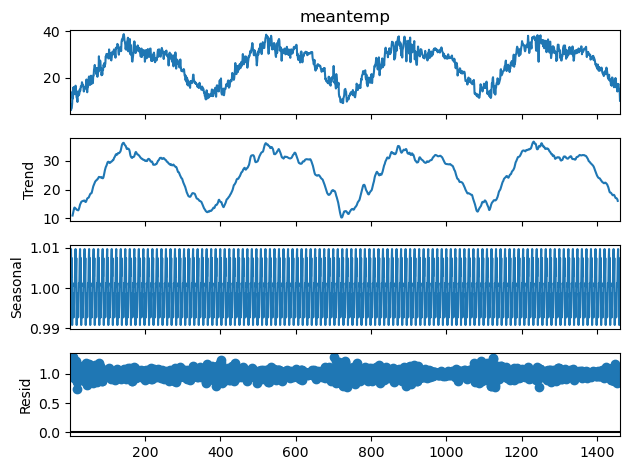

In [47]:
result = sm.tsa.seasonal_decompose(df['meantemp'], model='multiplicative', period=12)
fig = result.plot()